In [1]:
import keras

# 사용자 정의 히스토리 클래스 정의
class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []        
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))

Using TensorFlow backend.


In [2]:
# 모델 학습시키기

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

In [3]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [4]:
# 4. 모델 학습시키기

custom_hist = CustomHistory()
custom_hist.init()

for epoch_idx in range(1000):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(X_train, Y_train, epochs=1, batch_size=10, validation_data=(X_val, Y_val), callbacks=[custom_hist])

epochs : 0
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
epochs : 1
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 2.2067 - acc: 0.1786 - val_loss: 2.1906 - val_acc: 0.1800
epochs : 2
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 2.1733 - acc: 0.1829 - val_loss: 2.1641 - val_acc: 0.1800
epochs : 3
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 2.1446 - acc: 0.1957 - val_loss: 2.1408 - val_acc: 0.1833
epochs : 4
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 2.1186 - acc: 0.1929 - val_loss: 2.1150 - val_acc: 0.2000
epochs : 5
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [=============================

700/700 [==============================] - 0s - loss: 1.7944 - acc: 0.2471 - val_loss: 1.8560 - val_acc: 0.1733
epochs : 46
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.7914 - acc: 0.2414 - val_loss: 1.8558 - val_acc: 0.1833
epochs : 47
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.7887 - acc: 0.2429 - val_loss: 1.8549 - val_acc: 0.2033
epochs : 48
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.7855 - acc: 0.2629 - val_loss: 1.8517 - val_acc: 0.1833
epochs : 49
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.7827 - acc: 0.2471 - val_loss: 1.8467 - val_acc: 0.2233
epochs : 50
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.7796 - acc: 0.2629 - val_loss: 1.8445 - val_

700/700 [==============================] - 0s - loss: 1.7009 - acc: 0.3100 - val_loss: 1.8215 - val_acc: 0.2233
epochs : 91
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.6994 - acc: 0.2914 - val_loss: 1.8139 - val_acc: 0.2467
epochs : 92
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.6979 - acc: 0.2986 - val_loss: 1.8225 - val_acc: 0.2200
epochs : 93
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.6975 - acc: 0.2943 - val_loss: 1.8150 - val_acc: 0.2100
epochs : 94
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.6951 - acc: 0.2943 - val_loss: 1.8206 - val_acc: 0.23000.30
epochs : 95
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.6939 - acc: 0.3029 - val_loss: 1.8217 - 

700/700 [==============================] - 0s - loss: 1.6481 - acc: 0.3386 - val_loss: 1.8205 - val_acc: 0.2300
epochs : 136
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.6471 - acc: 0.3271 - val_loss: 1.8181 - val_acc: 0.2400
epochs : 137
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.6466 - acc: 0.3314 - val_loss: 1.8293 - val_acc: 0.2733
epochs : 138
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.6460 - acc: 0.3257 - val_loss: 1.8280 - val_acc: 0.2333
epochs : 139
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.6454 - acc: 0.3186 - val_loss: 1.8270 - val_acc: 0.2267
epochs : 140
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.6434 - acc: 0.3243 - val_loss: 1.8293 -

700/700 [==============================] - 0s - loss: 1.6097 - acc: 0.3557 - val_loss: 1.8492 - val_acc: 0.2300
epochs : 181
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.6109 - acc: 0.3414 - val_loss: 1.8421 - val_acc: 0.2267
epochs : 182
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.6101 - acc: 0.3371 - val_loss: 1.8580 - val_acc: 0.2167
epochs : 183
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.6078 - acc: 0.3543 - val_loss: 1.8524 - val_acc: 0.2533
epochs : 184
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.6087 - acc: 0.3429 - val_loss: 1.8477 - val_acc: 0.2500
epochs : 185
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.6079 - acc: 0.3443 - val_loss: 1.8424 -

700/700 [==============================] - 0s - loss: 1.5826 - acc: 0.3529 - val_loss: 1.8649 - val_acc: 0.2133
epochs : 226
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.5824 - acc: 0.3500 - val_loss: 1.8683 - val_acc: 0.2233
epochs : 227
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.5808 - acc: 0.3471 - val_loss: 1.8652 - val_acc: 0.2233
epochs : 228
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.5810 - acc: 0.3471 - val_loss: 1.8688 - val_acc: 0.2233
epochs : 229
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.5804 - acc: 0.3500 - val_loss: 1.8886 - val_acc: 0.2233
epochs : 230
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.5805 - acc: 0.3429 - val_loss: 1.8670 -

700/700 [==============================] - 0s - loss: 1.5598 - acc: 0.3571 - val_loss: 1.8998 - val_acc: 0.2267
epochs : 271
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.5590 - acc: 0.3614 - val_loss: 1.8942 - val_acc: 0.2200
epochs : 272
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.5584 - acc: 0.3671 - val_loss: 1.8979 - val_acc: 0.2267
epochs : 273
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.5582 - acc: 0.3514 - val_loss: 1.8951 - val_acc: 0.2533
epochs : 274
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.5581 - acc: 0.3614 - val_loss: 1.8955 - val_acc: 0.2100
epochs : 275
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.5563 - acc: 0.3457 - val_loss: 1.9035 -

700/700 [==============================] - 0s - loss: 1.5411 - acc: 0.3600 - val_loss: 1.9163 - val_acc: 0.2433
epochs : 316
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.5411 - acc: 0.3743 - val_loss: 1.9154 - val_acc: 0.2300
epochs : 317
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.5391 - acc: 0.3671 - val_loss: 1.9275 - val_acc: 0.2367
epochs : 318
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.5394 - acc: 0.3629 - val_loss: 1.9259 - val_acc: 0.2333
epochs : 319
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.5390 - acc: 0.3714 - val_loss: 1.9359 - val_acc: 0.2267
epochs : 320
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.5384 - acc: 0.3729 - val_loss: 1.9290 -

700/700 [==============================] - 0s - loss: 1.5235 - acc: 0.3729 - val_loss: 1.9480 - val_acc: 0.2167
epochs : 361
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.5223 - acc: 0.3671 - val_loss: 1.9538 - val_acc: 0.2367
epochs : 362
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.5205 - acc: 0.3743 - val_loss: 1.9486 - val_acc: 0.2600
epochs : 363
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.5234 - acc: 0.3757 - val_loss: 1.9534 - val_acc: 0.2300
epochs : 364
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.5215 - acc: 0.3729 - val_loss: 1.9462 - val_acc: 0.2133
epochs : 365
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.5205 - acc: 0.3814 - val_loss: 1.9551 -

700/700 [==============================] - 0s - loss: 1.5069 - acc: 0.3871 - val_loss: 1.9662 - val_acc: 0.2233
epochs : 406
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.5064 - acc: 0.3843 - val_loss: 1.9695 - val_acc: 0.2267
epochs : 407
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.5062 - acc: 0.3800 - val_loss: 1.9645 - val_acc: 0.2400
epochs : 408
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.5052 - acc: 0.3786 - val_loss: 1.9793 - val_acc: 0.2433
epochs : 409
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.5052 - acc: 0.3829 - val_loss: 1.9745 - val_acc: 0.2433
epochs : 410
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.5037 - acc: 0.3900 - val_loss: 1.9731 -

700/700 [==============================] - 0s - loss: 1.4916 - acc: 0.3743 - val_loss: 1.9862 - val_acc: 0.2300
epochs : 451
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4909 - acc: 0.4043 - val_loss: 1.9957 - val_acc: 0.2200
epochs : 452
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4930 - acc: 0.3829 - val_loss: 2.0213 - val_acc: 0.2367
epochs : 453
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4924 - acc: 0.3871 - val_loss: 1.9905 - val_acc: 0.2433
epochs : 454
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4924 - acc: 0.3914 - val_loss: 2.0020 - val_acc: 0.2367
epochs : 455
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4918 - acc: 0.3843 - val_loss: 1.9898 -

700/700 [==============================] - 0s - loss: 1.4804 - acc: 0.3871 - val_loss: 2.0118 - val_acc: 0.2267
epochs : 496
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4811 - acc: 0.3986 - val_loss: 2.0034 - val_acc: 0.2333
epochs : 497
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4798 - acc: 0.3914 - val_loss: 1.9914 - val_acc: 0.2267
epochs : 498
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4808 - acc: 0.3900 - val_loss: 2.0103 - val_acc: 0.2233
epochs : 499
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4794 - acc: 0.3929 - val_loss: 2.0333 - val_acc: 0.2233
epochs : 500
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4793 - acc: 0.3914 - val_loss: 2.0244 -

700/700 [==============================] - 0s - loss: 1.4693 - acc: 0.4071 - val_loss: 2.0325 - val_acc: 0.2500
epochs : 541
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4688 - acc: 0.3943 - val_loss: 2.0351 - val_acc: 0.2300
epochs : 542
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4698 - acc: 0.4000 - val_loss: 2.0409 - val_acc: 0.2267
epochs : 543
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4685 - acc: 0.4029 - val_loss: 2.0348 - val_acc: 0.2300
epochs : 544
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4688 - acc: 0.3957 - val_loss: 2.0358 - val_acc: 0.2333
epochs : 545
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4684 - acc: 0.3900 - val_loss: 2.0266 -

700/700 [==============================] - 0s - loss: 1.4594 - acc: 0.4014 - val_loss: 2.0406 - val_acc: 0.2267
epochs : 586
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4585 - acc: 0.4029 - val_loss: 2.0369 - val_acc: 0.2300
epochs : 587
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4578 - acc: 0.3971 - val_loss: 2.0697 - val_acc: 0.2467
epochs : 588
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4591 - acc: 0.3986 - val_loss: 2.0433 - val_acc: 0.2433
epochs : 589
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4599 - acc: 0.3957 - val_loss: 2.0486 - val_acc: 0.2267
epochs : 590
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4581 - acc: 0.4043 - val_loss: 2.0605 -

700/700 [==============================] - 0s - loss: 1.4502 - acc: 0.4186 - val_loss: 2.0564 - val_acc: 0.2300
epochs : 631
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4498 - acc: 0.4029 - val_loss: 2.0580 - val_acc: 0.2400
epochs : 632
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4500 - acc: 0.4014 - val_loss: 2.0585 - val_acc: 0.2467
epochs : 633
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4500 - acc: 0.4171 - val_loss: 2.0627 - val_acc: 0.2333
epochs : 634
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4492 - acc: 0.4129 - val_loss: 2.0575 - val_acc: 0.2400
epochs : 635
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4503 - acc: 0.4029 - val_loss: 2.0926 -

700/700 [==============================] - 0s - loss: 1.4420 - acc: 0.4129 - val_loss: 2.0781 - val_acc: 0.2333
epochs : 676
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4417 - acc: 0.4214 - val_loss: 2.0831 - val_acc: 0.2300
epochs : 677
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4410 - acc: 0.4057 - val_loss: 2.0850 - val_acc: 0.2333
epochs : 678
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4416 - acc: 0.4129 - val_loss: 2.0927 - val_acc: 0.2433
epochs : 679
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4397 - acc: 0.4114 - val_loss: 2.1019 - val_acc: 0.2367
epochs : 680
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4416 - acc: 0.4086 - val_loss: 2.0822 -

700/700 [==============================] - 0s - loss: 1.4320 - acc: 0.4157 - val_loss: 2.0948 - val_acc: 0.2567
epochs : 721
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4340 - acc: 0.4143 - val_loss: 2.1095 - val_acc: 0.2367
epochs : 722
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4331 - acc: 0.4200 - val_loss: 2.0954 - val_acc: 0.2367
epochs : 723
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4321 - acc: 0.4200 - val_loss: 2.1085 - val_acc: 0.2533
epochs : 724
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4318 - acc: 0.4186 - val_loss: 2.0999 - val_acc: 0.2533
epochs : 725
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4340 - acc: 0.4200 - val_loss: 2.1031 -

700/700 [==============================] - 0s - loss: 1.4248 - acc: 0.4257 - val_loss: 2.1352 - val_acc: 0.2367
epochs : 766
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4250 - acc: 0.4271 - val_loss: 2.1221 - val_acc: 0.2433
epochs : 767
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4243 - acc: 0.4286 - val_loss: 2.1226 - val_acc: 0.2400
epochs : 768
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4248 - acc: 0.4214 - val_loss: 2.1134 - val_acc: 0.2467
epochs : 769
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4248 - acc: 0.4214 - val_loss: 2.1273 - val_acc: 0.2467
epochs : 770
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4254 - acc: 0.4171 - val_loss: 2.1182 -

700/700 [==============================] - 0s - loss: 1.4186 - acc: 0.4171 - val_loss: 2.1409 - val_acc: 0.2433
epochs : 811
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4184 - acc: 0.4186 - val_loss: 2.1322 - val_acc: 0.2400
epochs : 812
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4181 - acc: 0.4257 - val_loss: 2.1314 - val_acc: 0.2400
epochs : 813
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4154 - acc: 0.4343 - val_loss: 2.1295 - val_acc: 0.2600
epochs : 814
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - ETA: 0s - loss: 1.4279 - acc: 0.416 - 0s - loss: 1.4169 - acc: 0.4229 - val_loss: 2.1507 - val_acc: 0.2333
epochs : 815
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4

700/700 [==============================] - 0s - loss: 1.4107 - acc: 0.4300 - val_loss: 2.1443 - val_acc: 0.2500
epochs : 856
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4113 - acc: 0.4386 - val_loss: 2.1302 - val_acc: 0.2400
epochs : 857
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4110 - acc: 0.4271 - val_loss: 2.1683 - val_acc: 0.2333
epochs : 858
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4120 - acc: 0.4300 - val_loss: 2.1412 - val_acc: 0.2467
epochs : 859
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4107 - acc: 0.4286 - val_loss: 2.1609 - val_acc: 0.2367
epochs : 860
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4115 - acc: 0.4286 - val_loss: 2.1419 -

700/700 [==============================] - 0s - loss: 1.4061 - acc: 0.4286 - val_loss: 2.1751 - val_acc: 0.2433
epochs : 901
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4039 - acc: 0.4329 - val_loss: 2.1506 - val_acc: 0.2500
epochs : 902
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4040 - acc: 0.4357 - val_loss: 2.1491 - val_acc: 0.2467
epochs : 903
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4041 - acc: 0.4243 - val_loss: 2.1650 - val_acc: 0.2467
epochs : 904
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4040 - acc: 0.4329 - val_loss: 2.1585 - val_acc: 0.2533
epochs : 905
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.4034 - acc: 0.4357 - val_loss: 2.1443 -

700/700 [==============================] - 0s - loss: 1.3991 - acc: 0.4314 - val_loss: 2.1923 - val_acc: 0.2467
epochs : 946
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.3979 - acc: 0.4414 - val_loss: 2.1689 - val_acc: 0.2567
epochs : 947
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.3987 - acc: 0.4400 - val_loss: 2.1757 - val_acc: 0.2467
epochs : 948
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.3983 - acc: 0.4314 - val_loss: 2.1991 - val_acc: 0.2500
epochs : 949
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.3985 - acc: 0.4357 - val_loss: 2.1883 - val_acc: 0.2467
epochs : 950
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.3977 - acc: 0.4314 - val_loss: 2.1804 -

700/700 [==============================] - 0s - loss: 1.3927 - acc: 0.4300 - val_loss: 2.2111 - val_acc: 0.2567
epochs : 991
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.3932 - acc: 0.4357 - val_loss: 2.1831 - val_acc: 0.2400
epochs : 992
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.3930 - acc: 0.4471 - val_loss: 2.1957 - val_acc: 0.2567
epochs : 993
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.3934 - acc: 0.4386 - val_loss: 2.1965 - val_acc: 0.2433
epochs : 994
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.3929 - acc: 0.4429 - val_loss: 2.2136 - val_acc: 0.2533
epochs : 995
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s - loss: 1.3929 - acc: 0.4371 - val_loss: 2.1837 -

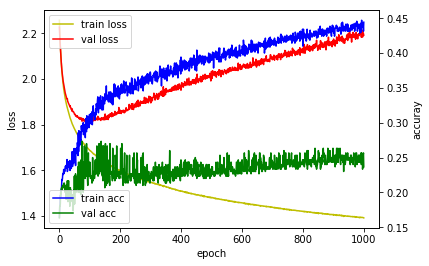

In [5]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(custom_hist.train_loss, 'y', label='train loss')
loss_ax.plot(custom_hist.val_loss, 'r', label='val loss')

acc_ax.plot(custom_hist.train_acc, 'b', label='train acc')
acc_ax.plot(custom_hist.val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()